### Statement of questions posed

* Which factors influenced the survival metric of a person? 
* Who has better survival chances? The ones who travelled with family? Or the ones who travelled alone?


### Steps taken for analysis based on the questions posed

* The most reasonable features or attributes to consider were — Gender, Age, SibSp and Parch, Pclass. These features are analysed against the Survived attribute. 


* Gender :- This was a simple computation of grouping by Male and Female. Plotted graph in terms of percentage to understand who had better survival rate. 


* Age :- Compared this against six age groups based on biological factors that I believe change in the humans. Roughly based on physical strength or endurance and the maturity levels. So created  six age brackets as follows : Age 0 to 8 yrs, 9 to 18 yrs, 19 to 28 yrs, 29 to 40 yrs, 41 to 60 yrs, 61 to 80 yrs. 


* Pclass :- Compared against three different classes :- First class, second class and third class.


* SibSp and Parch :- This feature is analysed to answer my second question. Again a simple computation of grouping by based on the accompany present for every passenger. A % plot to show if more alone people survived. 

In [1]:
#Importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# The edges and outlines of plots are defaulted to False in Notebook environment
plt.rcParams["patch.force_edgecolor"] = True 

In [2]:
#Read data

data='data/titanic-data.csv' 
data_frame = pd.read_csv(data)

# To show first few lines of the code
data_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data_frame.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Some missing values in 'Cabin' column. Therefore, we need to find the number of non-missing entries.
* We also find missing values in age and in Embarked. 
* In this analysis the rows with missing age values are automatically ignored, the defensive code takes care of that. So not wrangling around with it to create new set of data.

In [4]:
#To calculate number of valid rows, and total number of rows 

valid_rows = len(data_frame.dropna()) # dropna() Drops the NaN valued - rows.
total_rows = len(data_frame)

print "Valid rows = " + str(valid_rows)
print "Missing data rows = "+ str(total_rows - valid_rows)

Valid rows = 183
Missing data rows = 708


Looks like there are majority of rows which have missing data. Based on observing the data, columns 'Cabin' and 'Age' has some void values. Now, I am tempted to understand the overall picture of the data. 

In [5]:
#Shows overall picture of the data. Focuses on every feature.

data_frame.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* The eldest passenger is aged 80 years whereas the youngest one is 4.2 months old.
* The standard deviation is significantly high to understand that passengers of all age groups were present.
* The mean age is about 30 years. 
* Some of the passengers didn't pay any fare at all! 

Now let's explore how survival is affected by the factors. 

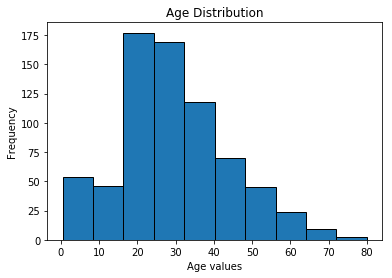

In [6]:
data_frame['Age'].plot.hist()
plt.xlabel('Age values')
plt.title('Age Distribution')
plt.show()

#### Single-variable (1d) exploration 

* The above plot shows age distribution across all the passengers.

In [7]:
# This is a function to draw bar plot, as explained in the official documentation.

def plott(data1, data2, title, c1, c2, n, l1,l2): 
    n_groups = 1
    means_men = (data1)
    means_women = (data2)

    fig, ax = plt.subplots()

    index = np.arange(n_groups)
    bar_width = 0.3

    opacity = 0.7
    error_config = {'ecolor': '0.3'}

    # Bar Plot One
    rects1 = plt.bar(index, means_men, bar_width,
                     alpha=opacity,
                     color=c1,
                     yerr=0,
                     error_kw=error_config,
                     label=l1)

    # Bar Plot Two
    rects2 = plt.bar(index +0.5 + bar_width, means_women, bar_width,
                     alpha=opacity,
                     color=c2,
                     yerr=0,
                     error_kw=error_config,
                     label=l2)

    plt.xlabel('')
    plt.ylabel('Percentages')
    plt.title(title)
    plt.xticks(index + bar_width, (''))
    plt.legend()
    plt.yticks(n)

    plt.tight_layout()
    plt.show()

In [8]:
# Survival based on gender.

m_passengers = len(data_frame[(data_frame['Survived'] == 1) &  (data_frame['Sex'] == "male")])
f_passengers = len(data_frame[(data_frame['Survived'] == 1) &  (data_frame['Sex'] == "female")])
tot_survived_passengers = m_passengers + f_passengers

print "Number of male passengers who survived : " + str(m_passengers)
print "Number of female passengers who survived : " + str(f_passengers)

Number of male passengers who survived : 109
Number of female passengers who survived : 233


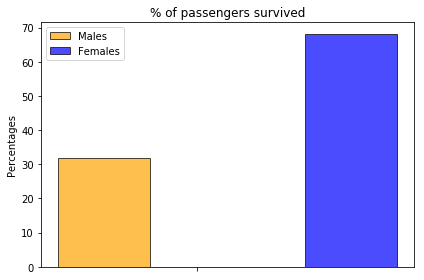

In [9]:
#Plot of percentages

plott((m_passengers/float(tot_survived_passengers))*100, (f_passengers/float(tot_survived_passengers))*100 ,'% of passengers survived','orange','blue',np.arange(0, 80, 10), 'Males', 'Females')

* More females survived than the males. 
* Therefore survival rate was higher in females than the male gender.

In [10]:
# Survival based on age groups. Let's consider various age groups. 

age_0_8 = len(data_frame[(data_frame['Survived'] == 1) & ((data_frame['Age'] >= 0) & (data_frame['Age'] <= 8))])
age_9_18 = len(data_frame[(data_frame['Survived'] == 1) &((data_frame['Age'] >= 9) & (data_frame['Age'] <= 18))])
age_19_28 = len(data_frame[(data_frame['Survived'] == 1) &((data_frame['Age'] >= 19) & (data_frame['Age'] <= 28))])
age_29_40 = len(data_frame[(data_frame['Survived'] == 1) &((data_frame['Age'] >= 29) & (data_frame['Age'] <= 40))])
age_41_60 = len(data_frame[(data_frame['Survived'] == 1) &((data_frame['Age'] >= 41) & (data_frame['Age'] <= 60))])
age_61_80 = len(data_frame[(data_frame['Survived'] == 1) &((data_frame['Age'] >= 61) & (data_frame['Age'] <= 80))])

age_list = [age_0_8, age_9_18, age_19_28, age_29_40, age_41_60, age_61_80] # List of all age group numbers. 
print age_list

[36, 34, 78, 87, 50, 5]


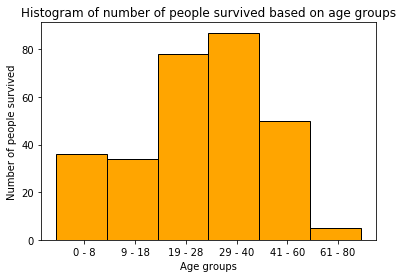

In [11]:
# Defining xticks
xticks = ['0 - 8', '9 - 18', '19 - 28', '29 - 40', '41 - 60', '61 - 80']

pos = np.arange(len(age_list))
width = 1.0     

ax = plt.axes()

# Setting label and ticks properties

ax.set_xticks(pos + (width/18))
ax.set_xticklabels(xticks)
ax.set_xlabel("Age groups")
ax.set_ylabel("Number of people survived")

plt.title('Histogram of number of people survived based on age groups')
plt.bar(pos, age_list, width, color='orange')
plt.show()

* Most of the passengers in the age-group 19-40 survived. 
* Very few survived from age-group 61-80 and also very few survived from 0-18 age groups. 
* This is an indication of strength and endurance during the crisis. Mostly the middle aged groups were strong enough. Not concluding this. This might be possible reason. 

In [12]:
# Survival based on seating class.

# Number of people in respective classes
fclass = len(data_frame[data_frame['Pclass'] == 1])
sclass = len(data_frame[data_frame['Pclass'] == 2])
tclass = len(data_frame[data_frame['Pclass'] == 3])

# Number of people survived in respective classes
fclass_survived= len(data_frame[(data_frame['Pclass'] == 1) & (data_frame['Survived'] == 1)])
sclass_survived= len(data_frame[(data_frame['Pclass'] == 2) & (data_frame['Survived'] == 1)])
tclass_survived= len(data_frame[(data_frame['Pclass'] == 3) & (data_frame['Survived'] == 1)])

# Number of people who didn't survive, in respective classes
fclass_not_survived = fclass-fclass_survived
sclass_not_survived = sclass-sclass_survived 
tclass_not_survived = tclass-tclass_survived

# Print out the values
print '{} = {}'.format('F - Class', fclass)
print '{} = {}'.format('S - Class', sclass)
print '{} = {}'.format('T - Class', tclass)
print ""
print '{} = {}'.format('F - Class Survived people', fclass_survived)
print '{} = {}'.format('S - Class Survived people', sclass_survived)
print '{} = {}'.format('T - Class Survived people', tclass_survived)
print '{} = {}'.format('F - Class Not Survived people', fclass_not_survived )
print '{} = {}'.format('S - Class Not Survived people',  sclass_not_survived)
print '{} = {}'.format('T - Class Not Survived people', tclass_not_survived)
print ""

# Calculating the percentage for the determining survival rate.
percent_fclass_survived = fclass_survived*1.0/fclass * 100
percent_sclass_survived = sclass_survived*1.0/sclass * 100
percent_tclass_survived = tclass_survived*1.0/tclass * 100

# Print out the percentage values.
print '{} = {}'.format('% of F-Class survival', percent_fclass_survived)
print '{} = {}'.format('% of S-Class survival', percent_sclass_survived)
print '{} = {}'.format('% of T-Class survival', percent_tclass_survived)

F - Class = 216
S - Class = 184
T - Class = 491

F - Class Survived people = 136
S - Class Survived people = 87
T - Class Survived people = 119
F - Class Not Survived people = 80
S - Class Not Survived people = 97
T - Class Not Survived people = 372

% of F-Class survival = 62.962962963
% of S-Class survival = 47.2826086957
% of T-Class survival = 24.2362525458


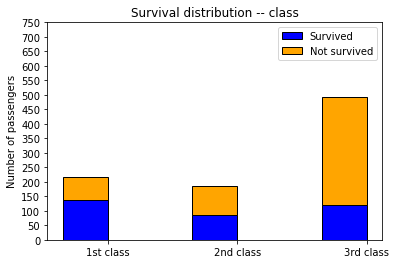

In [13]:
# Creating the tuples with respect to the classes.

mean_survived = (fclass_survived, sclass_survived, tclass_survived)
mean_not_survived = (fclass_not_survived, sclass_not_survived, tclass_not_survived)

ind = np.arange(3)
width = 0.35      

# Stack plot one, Survived.
p1 = plt.bar(ind, mean_survived, width, color='blue')

# Stack plot two, Not survived.
p2 = plt.bar(ind, mean_not_survived, width, color='orange',
             bottom=mean_survived)

# Setting label and tick properties.
plt.ylabel('Number of passengers')
plt.title('Survival distribution -- class')
plt.xticks(ind + width/2., ('1st class', '2nd class', '3rd class'))
plt.yticks(np.arange(0, 800, 50))
plt.legend((p1[0], p2[0]), ('Survived', 'Not survived'))

plt.show()

* The survival rate of a first class passenger is the most. 
* But a third class has better survival than 2nd class. 

In [14]:
# Survival based on accompany of the passengers. (Alone or Not Alone)

not_alone = (data_frame[(data_frame['SibSp']>0) | (data_frame['Parch']>0)])
alone = (data_frame[(data_frame['SibSp']==0) & (data_frame['Parch']==0)])

not_alone_survived = (data_frame[((data_frame['SibSp']>0) | (data_frame['Parch']>0)) & data_frame['Survived']])
alone_survived = (data_frame[((data_frame['SibSp']==0) & (data_frame['Parch']==0)) & data_frame['Survived']])

percent_not_alone_survived = len(not_alone_survived)* 1.0/len(not_alone)*100
percent_alone_survived = len(alone_survived)* 1.0/len(alone)*100

print '{} = {}'.format('% of survived who were not alone', percent_not_alone_survived)
print '{} = {}'.format('% of survived who were alone', percent_alone_survived)

% of survived who were not alone = 50.5649717514
% of survived who were alone = 30.3538175047


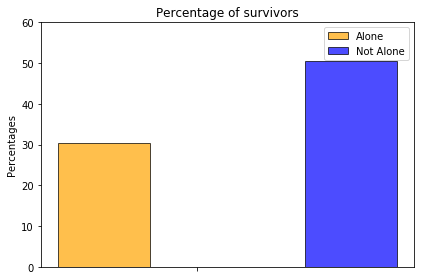

In [15]:
plott(percent_alone_survived, percent_not_alone_survived, 'Percentage of survivors', 'orange', 'blue', np.arange(0, 70, 10), 'Alone', 'Not Alone')

* More chances of survival when you were accompanied by someone, related to family. 

### Conclusions : 

#### Overall observations.

* The eldest passenger is aged 80 years whereas the youngest one is 4.2 months old.
* The standard deviation is significantly high to understand that passengers of all age groups were present.
* The mean age is about 30 years. 
* Some of the passengers didn't pay any fare at all! 

#### Factors which affected survival. 

* Survival rate was more in females, mainly because men took risk protecting them. Maybe. 
* Most of the passengers in the age-group 19-40 survived. 
* Very few survived from age-group 61-80 and also very few survived from 0-18 age groups. 
* This is an indication of strength and endurance during the crisis. Mostly the middle aged groups were strong enough. Not concluding this. This might be possible reason. 
* The survival rate of a first class passenger is the most. 
* But a third class has better survival than 2nd class. 

#### Survival based on accompany of the passengers. (Alone or Not Alone)

* More chances of survival when you were accompanied by someone, related to family. 
* This indicates how accompany is important morally to be brave enough to survive during such times. 
* Those who travelled alone probably couldn't reach out to others. 
* So travelling with the family ups your chances of survival as they can have better understanding on how to escape from the havoc. 

#### Major limitations while analyzing this dataset 

* It was filled with some missing values, so it would have been better with full data. 
* I was particularly interested to understand how cabin data could affect survival, unfortunately not sufficient info. 
* I think there's a possibility to predict those missing values. If we had ALL the passenger data. In the actual RMS Titanic, there were 2,224 people. Probably access to the whole dataset will help us predict missing values too! 891 rows aren't sufficient. We can use ML and correlation techniques to predict such missing value data based on similar features. This might not lead to correct info but it will definitely give better answer to the questions posed. 
* Though most features have a strong data value proposition, more variables which are fuzzy like Tickets and Fare values could also have been analyzed. For example :- Understanding how ticket numbers were generated and grouping them based on a pattern, and then finding its correlation with the fare values. This would have been a better analysis. So ticket values could have been more meaningfully concrete. 